In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [139]:
df=pd.read_csv('50_Startups.csv')
#Change of column name

df.rename(columns = {'R&D Spend':'RD_Spend', 'Marketing Spend':'Marketing_Spend'}, inplace = True)
df.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [141]:
df.isna().sum()

RD_Spend           0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [142]:
#correlation matrix
df.corr()

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


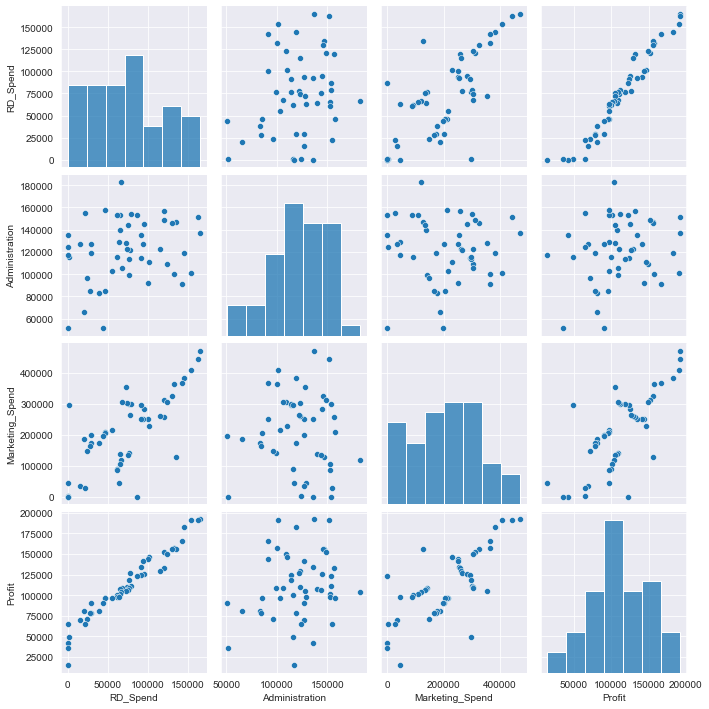

In [143]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [144]:
#building of model
import statsmodels.formula.api as smf
model=smf.ols( 'Profit~RD_Spend+Administration+Marketing_Spend' ,data=df).fit()

In [145]:
#coeff
model.params

Intercept          50122.192990
RD_Spend               0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [146]:
#pvalue and t value
print(model.tvalues,'\n',np.round(model.pvalues,5))

Intercept           7.626218
RD_Spend           17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          0.00000
RD_Spend           0.00000
Administration     0.60176
Marketing_Spend    0.10472
dtype: float64


In [147]:
#Rsquared
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [148]:
#model for profit & Administration
model_adm=smf.ols( 'Profit~Administration' ,data=df).fit()
print(model_adm.tvalues,'\n',np.round(model_adm.pvalues,5))

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.00382
Administration    0.16222
dtype: float64


In [149]:
#model for profit & Marketing_Spend    
model_mkt=smf.ols( 'Profit~Marketing_Spend' ,data=df).fit()
print(model_mkt.tvalues,'\n',np.round(model_mkt.pvalues,5))

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          0.0
Marketing_Spend    0.0
dtype: float64


In [150]:
#model for profit , Administration & Marketing_Spend 
model_am=smf.ols( 'Profit~Administration+Marketing_Spend' ,data=df).fit()
print(model_am.tvalues,'\n',np.round(model_am.pvalues,5))

Intercept          1.142741
Administration     2.467779
Marketing_Spend    8.281039
dtype: float64 
 Intercept          0.25893
Administration     0.01729
Marketing_Spend    0.00000
dtype: float64


# Model Validation Techniques: 
1. Collinearity Check  
2. Residual Analysis

In [151]:
#collinearity check
#vif=1/(1-rsquare) only for independent variables
#let
#RD_Spend as x1           
#Administration as x2    
#Marketing_Spend as x3




In [152]:
#rsquared values
x1=smf.ols('RD_Spend~Administration+Marketing_Spend',data=df).fit().rsquared
vif_x1=1/(1-x1)
x2=smf.ols('Administration~RD_Spend+Marketing_Spend',data=df).fit().rsquared
vif_x2=1/(1-x2)
x3=smf.ols('Marketing_Spend~RD_Spend+Administration',data=df).fit().rsquared
vif_x3=1/(1-x3)

In [153]:
#Sorting values in dataframe
d={'variables':['RD_Spend','Administration','Marketing_Spend'],'VIF':[vif_x1,vif_x2,vif_x3]}
vif_frame=pd.DataFrame(d)
vif_frame


,variables,VIF
0,RD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


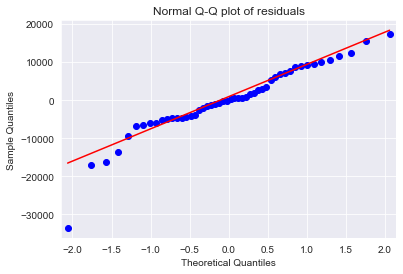

In [154]:
## Q-Q plot for checking normallity
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')  #45degree line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [155]:
list(np.where(model.resid<-25000))

[array([49], dtype=int64)]

In [156]:
#Residual plot for homoscedasticity z=(x-mue)/sigma
def standard_values(vals):return(vals-vals.mean())/vals.std()

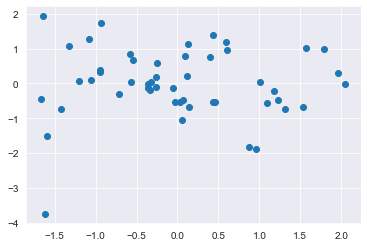

In [157]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))

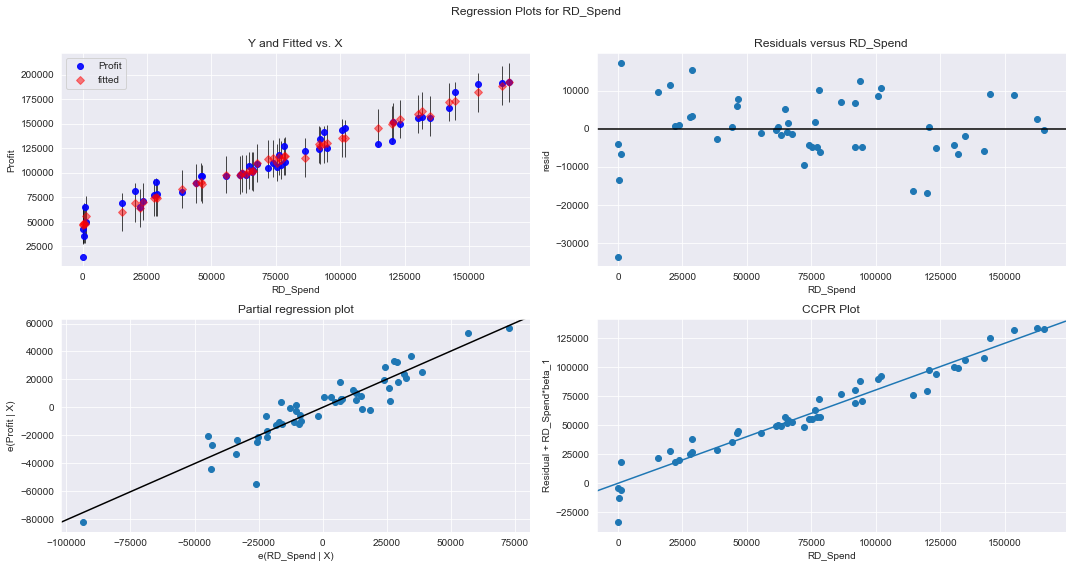

In [158]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RD_Spend',fig=fig)
plt.show()

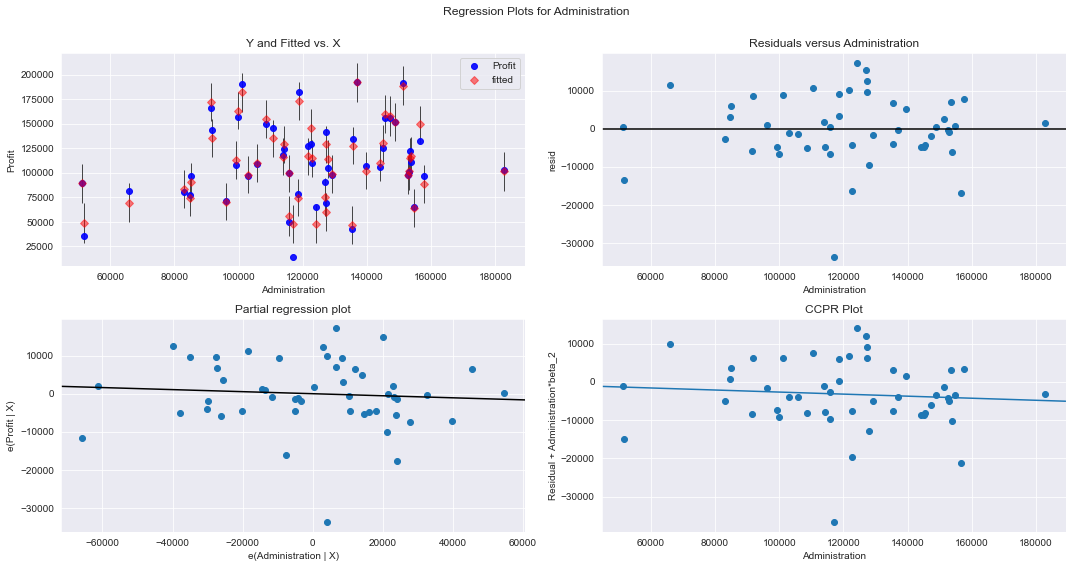

In [159]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

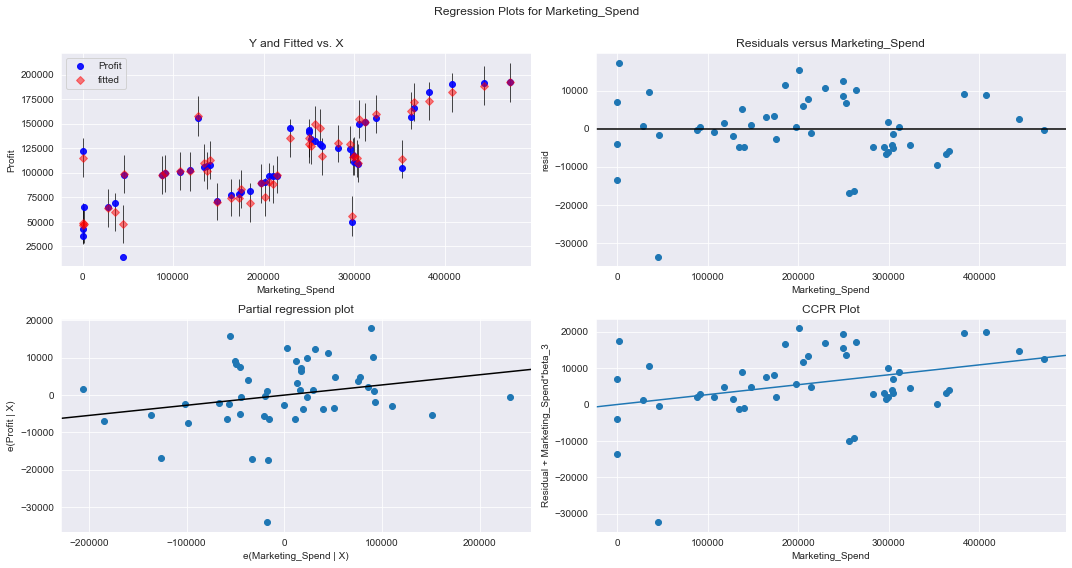

In [160]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Marketing_Spend',fig=fig)
plt.show()

In [161]:
(c,_)=model.get_influence().cooks_distance
c
#(c,_)===(distance,probability value)

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

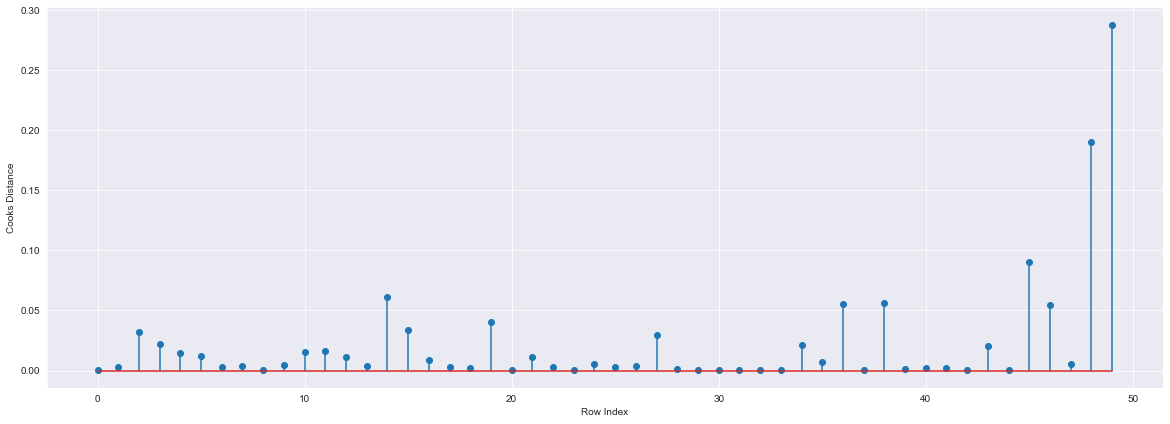

In [162]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [163]:
# index value of influencer where c is more than 0.5
np.argmax(c) , np.max(c)

(49, 0.2880822927543263)

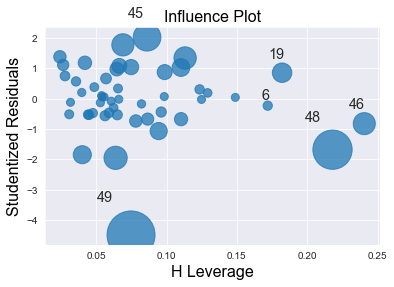

In [164]:
#High Influence Points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [165]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df.shape[1]
n=df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [166]:
df[df.index.isin([49])] 

,RD_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the Model


In [167]:
model2=smf.ols("Profit~RD_Spend+Administration+Marketing_Spend",data=df).fit()

In [168]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RD_Spend+Administration+Marketing_Spend",data=df).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        df=df.drop(df.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df
    else:
        final_model=smf.ols("Profit~RD_Spend+Administration+Marketing_Spend",data=df).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847
Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209413
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779906
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090915
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improve

In [169]:
final_model.rsquared

0.9882757054424702

In [170]:
#prediction for newdata points


In [171]:
df1=pd.DataFrame({'RD_Spend':50000,"Administration":95000,"Marketing_Spend":145000},index=[0])
df1

,RD_Spend,Administration,Marketing_Spend
0,50000,95000,145000


In [172]:
# Manual Prediction of Price
final_model.predict(df1)

0    91349.664492
dtype: float64

In [173]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(df)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

In [174]:
# table containing R^2 value for each prepared model

In [175]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276
